## Learninig Data Block API on Planet dataset

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path = Path('/home/jupyter/.fastai/data/planet')

In [4]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/__MACOSX'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg.tar.7z'),
 PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv.zip')]

In [5]:
fnames = get_image_files(path/'train-jpg')
fnames[:5], len(fnames), type(fnames)

([PosixPath('/home/jupyter/.fastai/data/planet/train-jpg/train_8879.jpg'),
  PosixPath('/home/jupyter/.fastai/data/planet/train-jpg/train_30524.jpg'),
  PosixPath('/home/jupyter/.fastai/data/planet/train-jpg/train_34064.jpg'),
  PosixPath('/home/jupyter/.fastai/data/planet/train-jpg/train_20128.jpg'),
  PosixPath('/home/jupyter/.fastai/data/planet/train-jpg/train_884.jpg')],
 40479,
 list)

In [6]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [7]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [17]:
## Provide inputs. Where to find data?
## Names of the data are stored in the train_v2.csv file under the column=0. Inside folder='train-jpg' is actual data(images).
## path will point to the rooth where we can find both image files and .csv
data = ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
data

ImageList (40479 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: /home/jupyter/.fastai/data/planet

In [18]:
## How to split in train/valid? 80/20 percent, by default
np.random.seed(42)
data = data.split_by_rand_pct()
data

ItemLists;

Train: ImageList (32384 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: /home/jupyter/.fastai/data/planet;

Valid: ImageList (8095 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: /home/jupyter/.fastai/data/planet;

Test: None

In [19]:
## How to label? Use labels from 1st column of .csv file. Labes are space-delimited by ' '.
data.label_from_df(label_delim=' ')
data.c, data

(17, LabelLists;
 
 Train: LabelList (32384 items)
 x: ImageList
 Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
 y: MultiCategoryList
 haze;primary,clear;primary,clear;primary,haze;primary;water,agriculture;clear;cultivation;primary;water
 Path: /home/jupyter/.fastai/data/planet;
 
 Valid: LabelList (8095 items)
 x: ImageList
 Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
 y: MultiCategoryList
 clear;primary;road,clear;primary;water,clear;conventional_mine;habitation;primary;road;water,cloudy,agriculture;clear;cultivation;cultivation;habitation;primary;road;water
 Path: /home/jupyter/.fastai/data/planet;
 
 Test: None)

In [20]:
## Data augmentation? Use tfms with a size of 128
data = data.transform(tfms, size=128)
data

LabelLists;

Train: LabelList (32384 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,clear;primary,clear;primary,haze;primary;water,agriculture;clear;cultivation;primary;water
Path: /home/jupyter/.fastai/data/planet;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary;road,clear;primary;water,clear;conventional_mine;habitation;primary;road;water,cloudy,agriculture;clear;cultivation;cultivation;habitation;primary;road;water
Path: /home/jupyter/.fastai/data/planet;

Test: None

In [21]:
## Finally? -> use the defaults for conversion to DataBunch
## A DataBunch is something which binds together a training data loader (train_dl) and a valid data loader (valid_dl).
data = data.databunch()
data

ImageDataBunch;

Train: LabelList (32384 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,clear;primary,clear;primary,haze;primary;water,agriculture;clear;cultivation;primary;water
Path: /home/jupyter/.fastai/data/planet;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary;road,clear;primary;water,clear;conventional_mine;habitation;primary;road;water,cloudy,agriculture;clear;cultivation;cultivation;habitation;primary;road;water
Path: /home/jupyter/.fastai/data/planet;

Test: None

In [22]:
## Normalize images using imagenet statistic
data = data.normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (32384 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,clear;primary,clear;primary,haze;primary;water,agriculture;clear;cultivation;primary;water
Path: /home/jupyter/.fastai/data/planet;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary;road,clear;primary;water,clear;conventional_mine;habitation;primary;road;water,cloudy,agriculture;clear;cultivation;cultivation;habitation;primary;road;water
Path: /home/jupyter/.fastai/data/planet;

Test: None

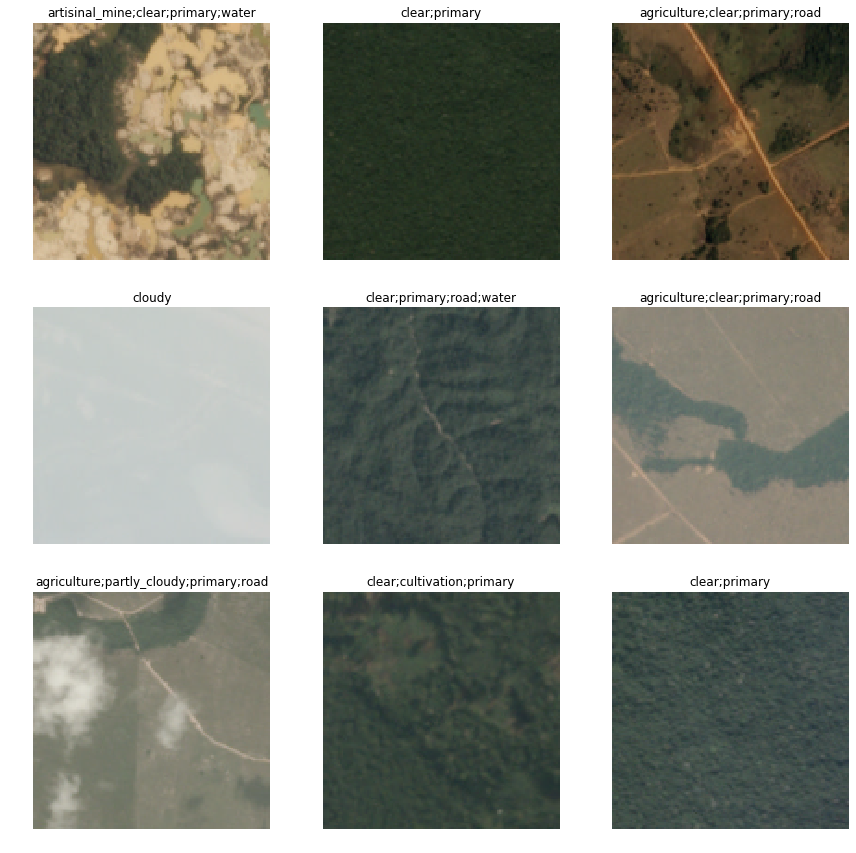

In [23]:
data.show_batch(rows=3, figsixe=(10,8))

In [24]:
data.train_ds

LabelList (32384 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,clear;primary,clear;primary,haze;primary;water,agriculture;clear;cultivation;primary;water
Path: /home/jupyter/.fastai/data/planet

In [25]:
data.train_ds.x[0], data.train_ds.y[0]

(Image (3, 256, 256), MultiCategory haze;primary)

In [26]:
data.train_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f850531e630>, device=device(type='cuda', index=0), tfms=[functools.partial(<function _normalize_batch at 0x7f850a0bb598>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x7f8510e55620>)

In [32]:
data.train_ds.classes, data.train_ds.c

(['agriculture',
  'artisinal_mine',
  'bare_ground',
  'blooming',
  'blow_down',
  'clear',
  'cloudy',
  'conventional_mine',
  'cultivation',
  'habitation',
  'haze',
  'partly_cloudy',
  'primary',
  'road',
  'selective_logging',
  'slash_burn',
  'water'],
 17)